In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from models import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 2500 MB, cuDNN 5105)


In [2]:
X_train = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched_PE/X_train_thres_10.npy')
y_train = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched_PE/y_train_thres_10.npy')
X_valid = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched_PE/X_valid_thres_10.npy')
y_valid = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched_PE/y_valid_thres_10.npy')
X_test = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched_PE/X_test_thres_10.npy')
y_test = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched_PE/y_test_thres_10.npy')

In [3]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [22]:
dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)
scores_from_10_iter =[]
for i in range(10):
    validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
    dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)
    dnn_normalized.save('dnn_CONV_wo_dist', '/users/mtaranov/LongRange3D/')
    print "Iter",i, " summary:"
    print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))
    print(dnn_normalized.test(X_train_normalized[:, :, :10, :], y_train))
    print(dnn_normalized.test(X_valid_normalized[:, :, :10, :], y_valid))
    
    weights='/users/mtaranov/LongRange3D/weights/dnn_CONV_wo_dist.weights.h5'
    json_model='/users/mtaranov/LongRange3D/models/dnn_CONV_wo_dist.arch.json'
    scores = dnn_normalized.deeplift(X_valid_normalized[:, :, :10, :], weights, json_model, batch_size=128)
    scores_from_10_iter.append(scores)

# pred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
# #np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
# pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
# #np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
# pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
# #np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

Training model...
Train on 4794 samples, validate on 2768 samples
Epoch 1/100
4750/4794 [============================>.] - ETA: 0s - loss: 2.2057Epoch 0: validation loss: 0.579
Balanced Accuracy: 70.38%	 auROC: 0.767	 auPRC: 0.748	 auPRG: 0.546
Recall at 5%|10%|20% FDR: 0.4%|1.4%|33.7%	 Num Positives: 1384	 Num Negatives: 1384	 

4794/4794 [==============================] - 1s - loss: 2.1962 - val_loss: 0.5790
Epoch 2/100
4750/4794 [============================>.] - ETA: 0s - loss: 1.1787Epoch 1: validation loss: 0.577
Balanced Accuracy: 70.34%	 auROC: 0.775	 auPRC: 0.763	 auPRG: 0.565
Recall at 5%|10%|20% FDR: 1.4%|8.8%|36.6%	 Num Positives: 1384	 Num Negatives: 1384	 

4794/4794 [==============================] - 1s - loss: 1.1770 - val_loss: 0.5769
Epoch 3/100
4750/4794 [============================>.] - ETA: 0s - loss: 1.1459Epoch 2: validation loss: 0.563
Balanced Accuracy: 70.70%	 auROC: 0.786	 auPRC: 0.777	 auPRG: 0.585
Recall at 5%|10%|20% FDR: 0.5%|12.3%|47.8%	 Num Positives: 

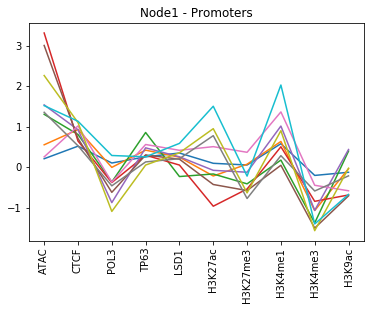

In [23]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 0], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node1 - Promoters')

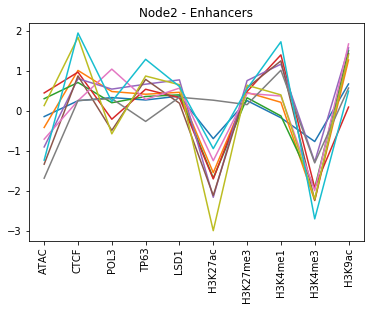

In [24]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 1], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node2 - Enhancers')

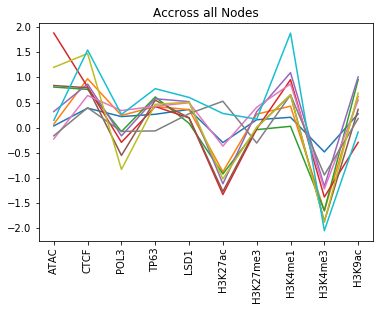

In [25]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=0), axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Accross all Nodes')

In [26]:
i=0
vmin = np.min(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=1))
vmax = np.max(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=1))
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
x = [float(i+0.5) for i in range(np.shape(scores)[2])]

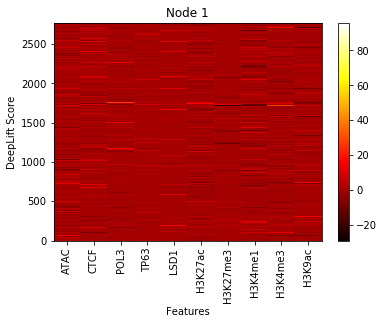

In [27]:
#plt.imshow(scores[:, 0, :, 0], cmap='hot', interpolation='nearest')
i=0
plt.pcolor(scores_from_10_iter[i][:, 0, :, 0], cmap='hot', vmin=vmin, vmax=vmax) # cmap='RdBu'
plt.xticks(x, features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('DeepLift Score')
plt.title('Node 1')
plt.colorbar()

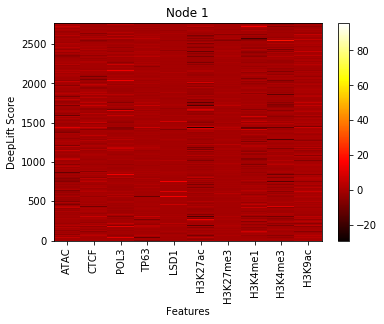

In [28]:
#plt.imshow(scores[:, 0, :, 1], cmap='hot', interpolation='nearest')
i=0
plt.pcolor(scores_from_10_iter[i][:, 0, :, 1], cmap='hot', vmin=vmin, vmax=vmax) # cmap='RdBu'
plt.xticks(x, features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('DeepLift Score')
plt.title('Node 1')
plt.colorbar()

# with genomic locations

In [11]:
dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)
scores_from_10_iter =[]
for i in range(10):
    validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
    dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)
    dnn_normalized.save('dnn_CONV_w_dist', '/users/mtaranov/LongRange3D/')
    print "Iter",i, " summary:"
    print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))
    print(dnn_normalized.test(X_train_normalized[:, :, :11, :], y_train))
    print(dnn_normalized.test(X_valid_normalized[:, :, :11, :], y_valid))
    
    weights='/users/mtaranov/LongRange3D/weights/dnn_CONV_w_dist.weights.h5'
    json_model='/users/mtaranov/LongRange3D/models/dnn_CONV_w_dist.arch.json'
    scores = dnn_normalized.deeplift(X_valid_normalized[:, :, :11, :], weights, json_model, batch_size=128)
    scores_from_10_iter.append(scores)

Training model...
Train on 4794 samples, validate on 2768 samples
Epoch 1/100
4750/4794 [============================>.] - ETA: 0s - loss: 2.1209Epoch 0: validation loss: 0.595
Balanced Accuracy: 70.45%	 auROC: 0.769	 auPRC: 0.754	 auPRG: 0.546
Recall at 5%|10%|20% FDR: 0.4%|3.0%|36.8%	 Num Positives: 1384	 Num Negatives: 1384	 

4794/4794 [==============================] - 1s - loss: 2.1114 - val_loss: 0.5953
Epoch 2/100
4750/4794 [============================>.] - ETA: 0s - loss: 1.1775Epoch 1: validation loss: 0.566
Balanced Accuracy: 71.06%	 auROC: 0.780	 auPRC: 0.765	 auPRG: 0.569
Recall at 5%|10%|20% FDR: 1.4%|3.0%|44.4%	 Num Positives: 1384	 Num Negatives: 1384	 

4794/4794 [==============================] - 1s - loss: 1.1767 - val_loss: 0.5663
Epoch 3/100
4750/4794 [============================>.] - ETA: 0s - loss: 1.1290Epoch 2: validation loss: 0.565
Balanced Accuracy: 72.29%	 auROC: 0.789	 auPRC: 0.773	 auPRG: 0.596
Recall at 5%|10%|20% FDR: 0.2%|9.0%|43.7%	 Num Positives: 1

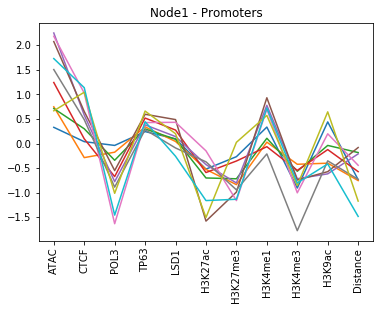

In [18]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'Distance']
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 0], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node1 - Promoters')

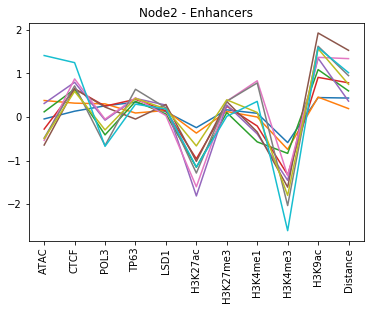

In [19]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 1], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node2 - Enhancers')

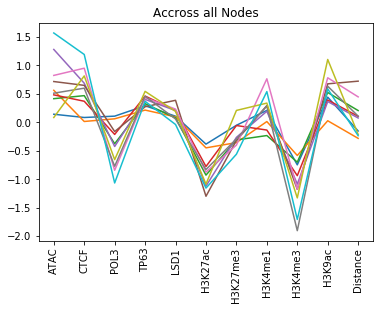

In [14]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=0), axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Accross all Nodes')

# with distance only

In [15]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)

In [16]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, 10:, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, 10:, :], y_train, validation_data)

Training model...
Train on 4794 samples, validate on 2768 samples
Epoch 1/100
4750/4794 [============================>.] - ETA: 0s - loss: 2.0822Epoch 0: validation loss: 0.703
Balanced Accuracy: 50.00%	 auROC: 0.513	 auPRC: 0.517	 auPRG: 0.007
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 1384	 Num Negatives: 1384	 

4794/4794 [==============================] - 1s - loss: 2.0758 - val_loss: 0.7030
Epoch 2/100
4750/4794 [============================>.] - ETA: 0s - loss: 1.3997Epoch 1: validation loss: 0.694
Balanced Accuracy: 50.76%	 auROC: 0.510	 auPRC: 0.511	 auPRG: 0.012
Recall at 5%|10%|20% FDR: 0.4%|0.4%|0.7%	 Num Positives: 1384	 Num Negatives: 1384	 

4794/4794 [==============================] - 1s - loss: 1.3995 - val_loss: 0.6936
Epoch 3/100
4750/4794 [============================>.] - ETA: 0s - loss: 1.3895Epoch 2: validation loss: 0.692
Balanced Accuracy: 50.07%	 auROC: 0.515	 auPRC: 0.511	 auPRG: 0.036
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 1384

In [17]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))

Balanced Accuracy: 53.76%	 auROC: 0.544	 auPRC: 0.533	 auPRG: 0.088
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 972	 Num Negatives: 972	 


# ---------------------------------------------------------------------------------------

# Print prediction

In [70]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_train_thres_10.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_valid_thres_10.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_test_thres_10.npy')

In [71]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [72]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


In [73]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


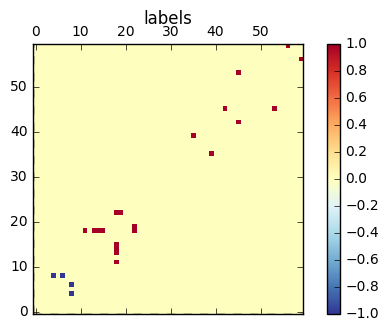

1.0
(60, 60)
Limit: 1.0


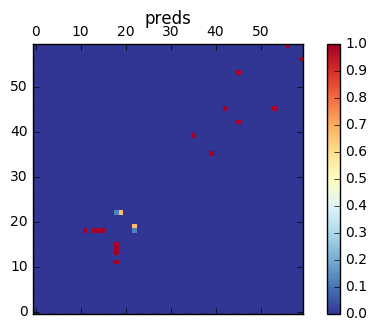

In [74]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )